In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train_ctrUa4K.csv")
test=pd.read_csv("test_lAUu6dG.csv")

In [3]:
train_original=train.copy()
test_original=test.copy()

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.shape

(614, 13)

In [8]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [11]:
test.shape

(367, 12)

In [12]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
train["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

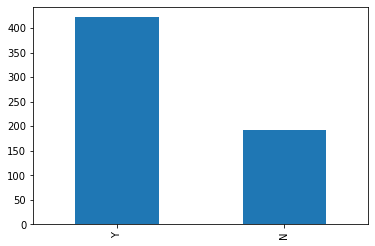

In [14]:
train["Loan_Status"].value_counts().plot.bar()

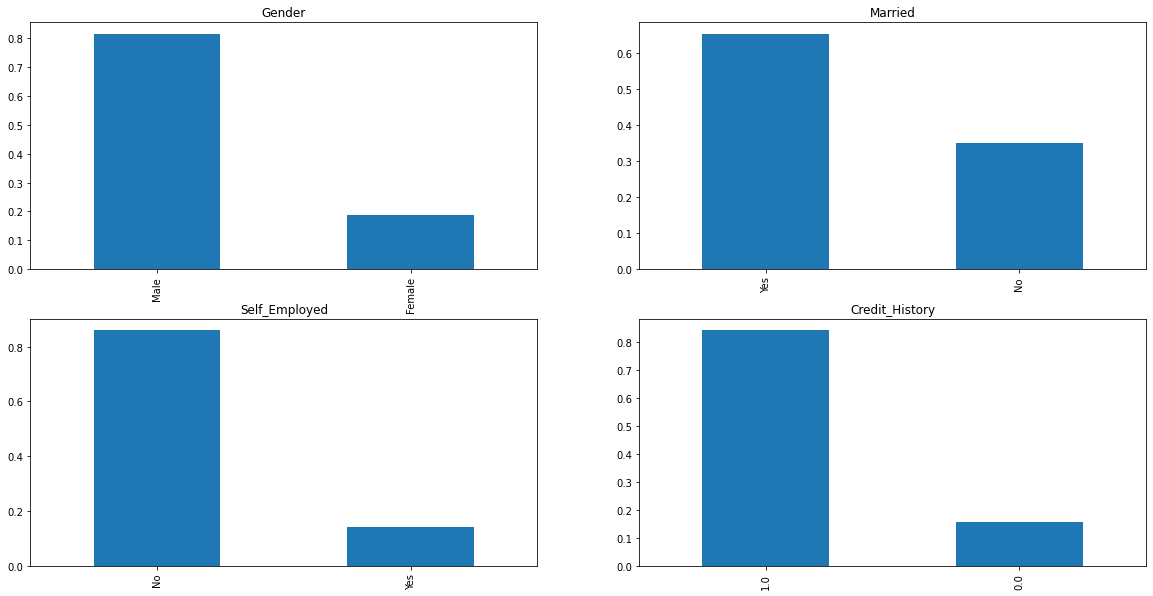

In [15]:
plt.figure(1)
plt.subplot(2,2,1)
train["Gender"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Gender")
plt.subplot(2,2,2)
train["Married"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Married")
plt.subplot(2,2,3)
train["Self_Employed"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Self_Employed")
plt.subplot(2,2,4)
train["Credit_History"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Credit_History")

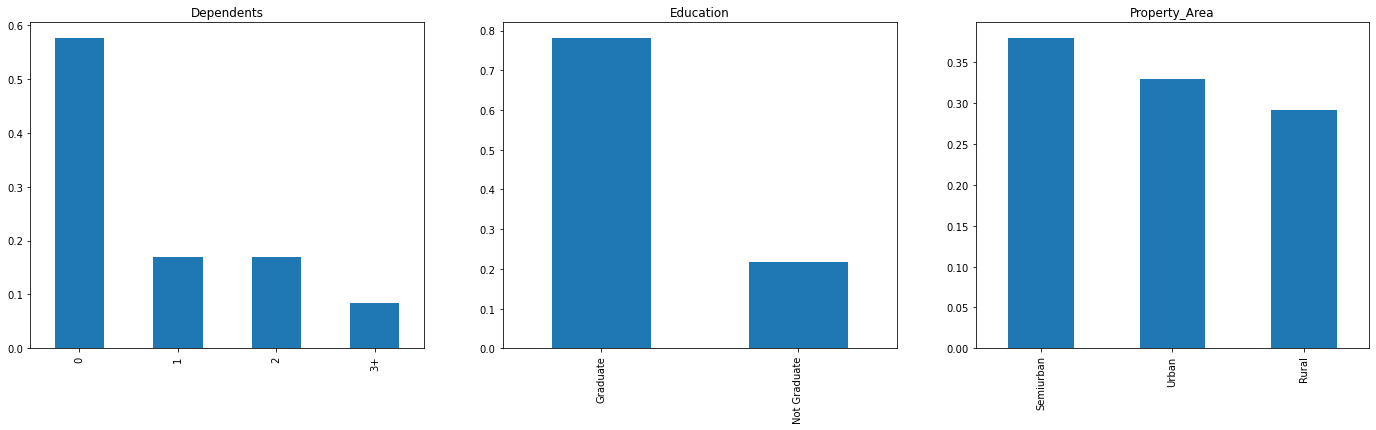

In [16]:
plt.figure(1)
plt.subplot(1,3,1)
train["Dependents"].value_counts(normalize=True).plot.bar(figsize=(24,6),title="Dependents")

plt.subplot(1,3,2)
train["Education"].value_counts(normalize=True).plot.bar(figsize=(24,6),title="Education")

plt.subplot(1,3,3)
train["Property_Area"].value_counts(normalize=True).plot.bar(figsize=(24,6),title="Property_Area")

plt.show()

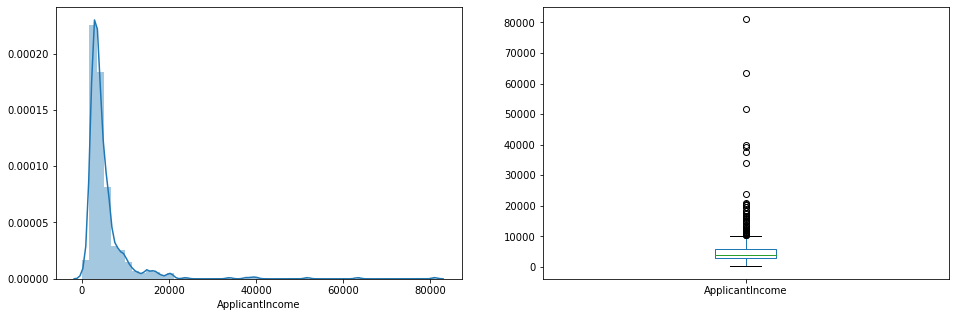

In [17]:
plt.subplot(1,2,1)
sns.distplot(train["ApplicantIncome"])

plt.subplot(1,2,2)
train["ApplicantIncome"].plot.box(figsize=(16,5))

Text(0.5, 0.98, ' ')

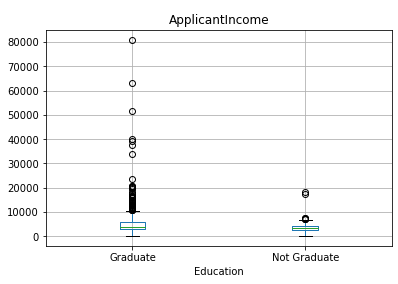

In [18]:
train.boxplot(by="Education",column="ApplicantIncome")
plt.suptitle(" ")

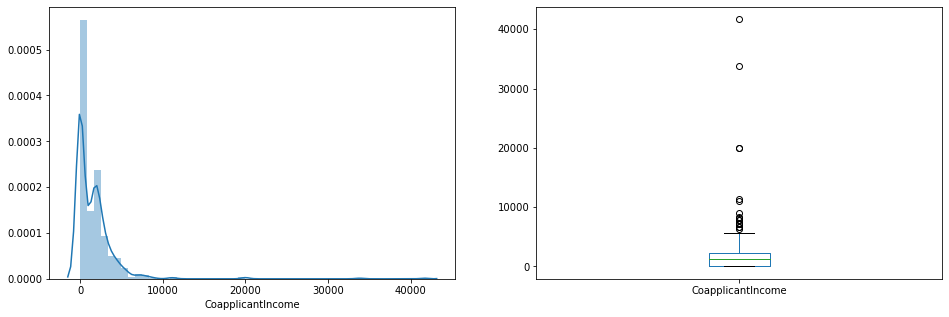

In [19]:
plt.subplot(1,2,1)
sns.distplot(train["CoapplicantIncome"])

plt.subplot(1,2,2)
train["CoapplicantIncome"].plot.box(figsize=(16,5))

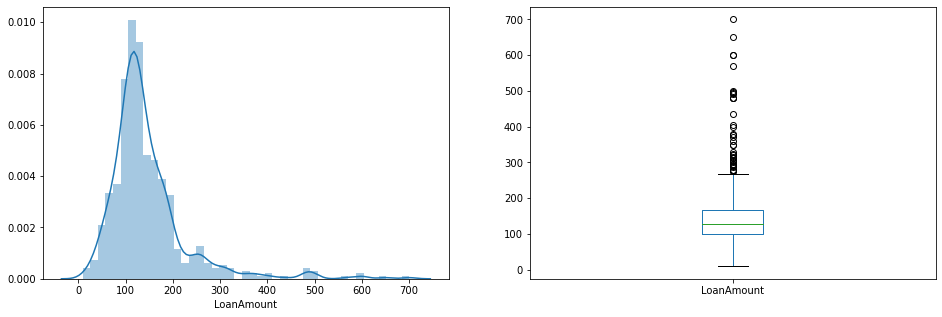

In [20]:
plt.subplot(1,2,1)
sns.distplot(train["LoanAmount"])

plt.subplot(1,2,2)
train["LoanAmount"].plot.box(figsize=(16,5))

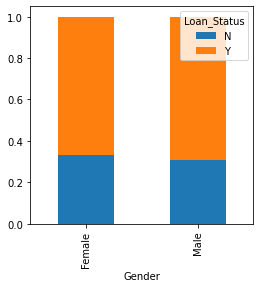

In [21]:
Gender=pd.crosstab(train["Gender"],train["Loan_Status"])

Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

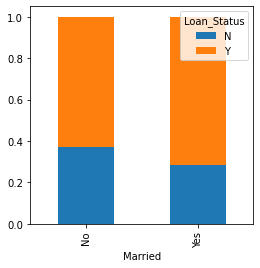

In [22]:
Married=pd.crosstab(train["Married"],train["Loan_Status"])

Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

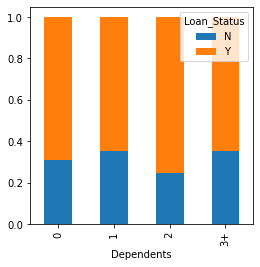

In [23]:
Dependents=pd.crosstab(train["Dependents"],train["Loan_Status"])

Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

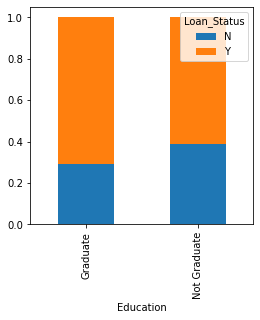

In [24]:
Education=pd.crosstab(train["Education"],train["Loan_Status"])

Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

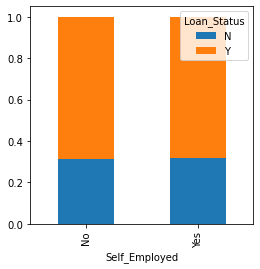

In [25]:
Self_Employed=pd.crosstab(train["Self_Employed"],train["Loan_Status"])

Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

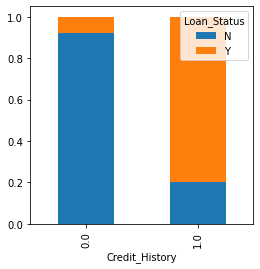

In [26]:
Credit_History=pd.crosstab(train["Credit_History"],train["Loan_Status"])

Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

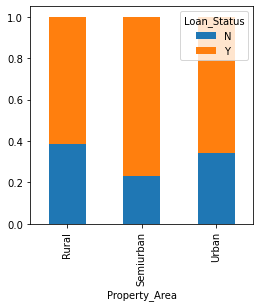

In [27]:
Property_Area=pd.crosstab(train["Property_Area"],train["Loan_Status"])

Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

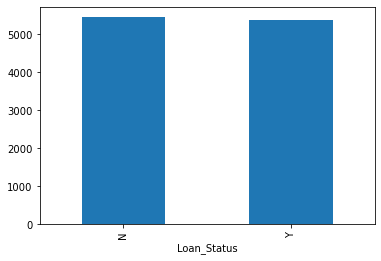

In [28]:
train.groupby("Loan_Status")["ApplicantIncome"].mean().plot(kind="bar")

In [29]:
bins=[0,2500,4000,6000,81000]

group=["Low","Average","High","Very High"]

train["Income_bins"]=pd.cut(train["ApplicantIncome"],bins,labels=group)

Text(0, 0.5, 'Percentage')

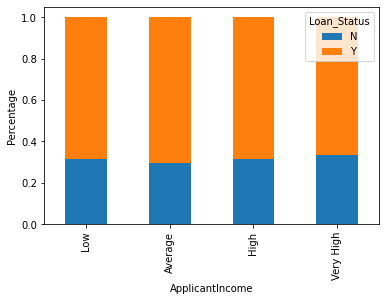

In [30]:
Income_bins=pd.crosstab(train["Income_bins"],train["Loan_Status"])

Income_bins.div(Income_bins.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

plt.xlabel("ApplicantIncome")

plt.ylabel("Percentage")

Text(0, 0.5, 'Percentage')

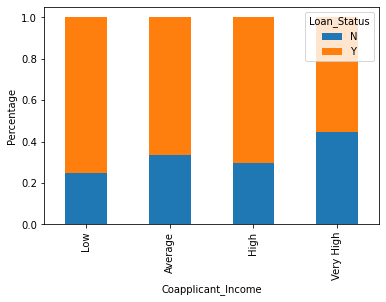

In [31]:
bins=[0,2500,4000,6000,81000]

group=["Low","Average","High","Very High"]

train["CoapplicantIncome_bins"]=pd.cut(train["CoapplicantIncome"],bins,labels=group)

CoapplicantIncome_bins=pd.crosstab(train["CoapplicantIncome_bins"],train["Loan_Status"])

CoapplicantIncome_bins.div(CoapplicantIncome_bins.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

plt.xlabel("Coapplicant_Income")

plt.ylabel("Percentage")

In [32]:
train["Total_Income"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Loan_ID                 614 non-null    object  
 1   Gender                  601 non-null    object  
 2   Married                 611 non-null    object  
 3   Dependents              599 non-null    object  
 4   Education               614 non-null    object  
 5   Self_Employed           582 non-null    object  
 6   ApplicantIncome         614 non-null    int64   
 7   CoapplicantIncome       614 non-null    float64 
 8   LoanAmount              592 non-null    float64 
 9   Loan_Amount_Term        600 non-null    float64 
 10  Credit_History          564 non-null    float64 
 11  Property_Area           614 non-null    object  
 12  Loan_Status             614 non-null    object  
 13  Income_bins             614 non-null    category
 14  CoapplicantIncome_bins  34

In [34]:
bins=[0,2500,4000,6000,81000]

group=["Low","Average","High","Very High"]

train["Total_Income_bins"]=pd.cut(train["Total_Income"],bins,labels=group)

Total_Income_bins=pd.crosstab(train["Total_Income_bins"],train["Loan_Status"])



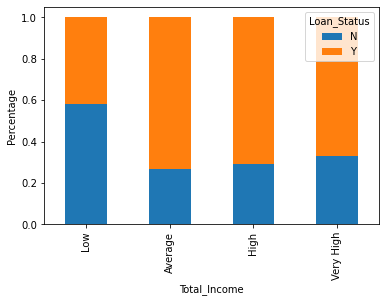

In [35]:
Total_Income_bins.div(Total_Income_bins.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

plt.xlabel("Total_Income")

P=plt.ylabel("Percentage")

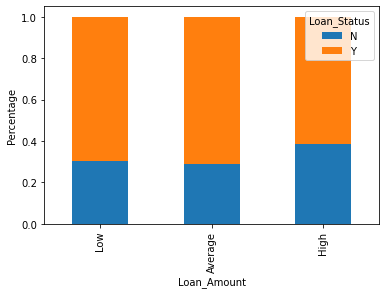

In [36]:
bins=[0,100,200,700]

group=["Low","Average","High"]

train["LoanAmount_bins"]=pd.cut(train["LoanAmount"],bins,labels=group)

LoanAmount_bins=pd.crosstab(train["LoanAmount_bins"],train["Loan_Status"])

LoanAmount_bins.div(LoanAmount_bins.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

plt.xlabel("Loan_Amount")

P=plt.ylabel("Percentage")

In [37]:
train=train.drop(["Income_bins","CoapplicantIncome_bins","Total_Income_bins","LoanAmount_bins","Total_Income"],axis=1)

In [38]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [39]:
train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [40]:
train["Dependents"].replace("3+",3,inplace=True)

test["Dependents"].replace("3+",3,inplace=True)

train["Loan_Status"].replace("Y",1,inplace=True)

train["Loan_Status"].replace("N",0,inplace=True)

In [41]:
train["Dependents"].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

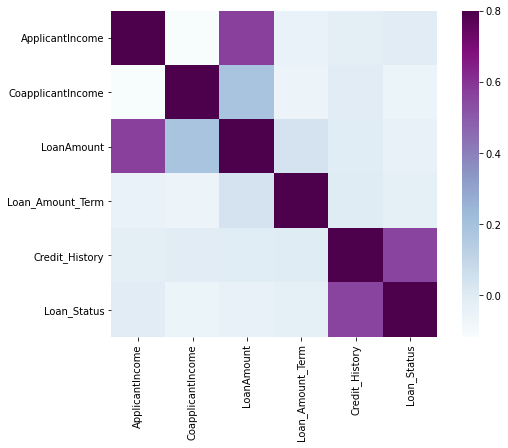

In [42]:
matrix=train.corr()

f,ax=plt.subplots(figsize=(9,6))

sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu")

In [43]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

In [45]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [47]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

In [48]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [49]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [50]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test["Dependents"].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

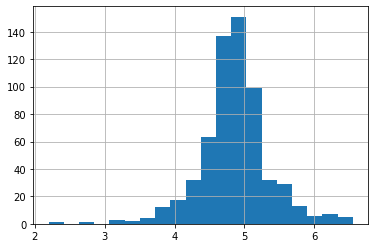

In [51]:
train["Loan_Amount_log"]=np.log(train["LoanAmount"])

train["Loan_Amount_log"].hist(bins=20)

test["Loan_Amount_log"]=np.log(test["LoanAmount"])

In [52]:
train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

In [53]:
X=train.drop("Loan_Status",1)
y=train["Loan_Status"]

In [54]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Amount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760


In [55]:
X=pd.get_dummies(X)

In [56]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Amount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [57]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [58]:
from sklearn.model_selection import train_test_split

x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [60]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [62]:
LogisticRegression(C=0.1,class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, 
                  multi_class="ovr", n_jobs=1, penalty="12", random_state=1, solver="liblinear", tol=0.001, verbose=0, 
                warm_start=False)

LogisticRegression(C=0.1, multi_class='ovr', n_jobs=1, penalty='12',
                   random_state=1, solver='liblinear', tol=0.001)

In [63]:
pred_cv=model.predict(x_cv)

In [64]:
accuracy_score(y_cv,pred_cv)

0.7945945945945946

In [65]:
test_pred=model.predict(test)

In [66]:
submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [67]:
submission["Loan_Status"]=test_pred

In [68]:
submission["Loan_ID"]=test_original["Loan_ID"]

In [71]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [70]:
submission["Loan_Status"].replace(0,"N",inplace=True)
submission["Loan_Status"].replace(1,"Y",inplace=True)

In [73]:
pd.DataFrame(submission,columns=["Loan_ID","Loan_Status"]).to_csv("logistic.csv",index=False)